# Trabalho 2 IA2

## Criando o Perceptron

Na aula prática passada nós construimos um perceptron simples para realizar uma tarefa de classificação. Hoje iremos criar uma classe Perceptron para que possamos utilizá-la na solução de um problema mais complexo.

Link da aula: https://colab.research.google.com/drive/1elhlWjfiie2ypTpFuR-GDzMPnCrgmVKi?usp=sharing

![picture](https://drive.google.com/uc?id=1W8SXGn7Y-9YqTUEBSWtcXhB-9zpjSeG6)

Nosso neurônio perceptron irá precisar de um **bias**. Esse **bias** irá servir para expandir as capacidades do nosso componente. 

Basta imaginar que nosso neurônio é capaz de traçar uma linha separando os dados, porém treinando e manipulando apenas os pesos a equação da linha resultante fica: Y = a*X. Com a introdução do **bias**, e seu consequente treinamento, será possível traçar linhas do tipo Y = a*X + b, o que permitirá a linha "descolar" da origem ([0,0] para o exemplo em 2 dimensões).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron(object):
  
  def __init__(self, alpha=0.1, epochs=10):
    np.random.seed(1) # [OBS1]
    self.alpha = alpha # alpha é a nossa taxa de aprendizado
    self.epochs = epochs
    self.weights = None
    self.bias = None
  
  def fit (self, X, Y):
    n_samples, n_features = X.shape
    # Inicialize os Pesos e Bias: [ATIVIDADE 1]
    self.weights = 2*np.random.random((n_features,))-1
    self.bias = 2*np.random.random() -1

    for epoch in range(self.epochs):

      for x_i,y_esperado in zip(X,Y):

        predicao = self.predict(x_i.T)
        erro = y_esperado - predicao
        self.weights += x_i * self.alpha * erro
        self.bias += self.alpha * erro

        # Defina as funções de treinamento: [ATIVIDADE 2]


  def predict(self, X):
    # Calcule o output do perceptron: [ATIVIDADE 3]
    z = np.dot(X, self.weights) + self.bias
    output = self.activation(z)
    return output

  def activation(self, signal):
    return np.where(signal >= 0, 1, 0) # Função degrau de ativação


OBS1: Inicializando Seed de Random para que seja possível realizar testes com inicialização de pesos aleatória, e também seja possível replicar os testes caso necessário. Para alterar os pesos iniciais basta mudar o inteiro passado na função **np.random.seed()**.
### Atividade 1 - Inicialize os Pesos e Bias
Na chamada do método fit, inicialize os pesos (self.weights) e bias (self.bias) para valores aleatórios entre -1 e 1. (Se precisar de ajuda consulte a última sessão da aula: **Code Snippets**)

### Atividade 2 - Defina as funções de treinamento
Para cada input é necessário calcular o output do perceptron (chamando a função self.predict), a partir do output podemos calcular o erro (output_desejado - output), e devemos atualizar os pesos (input * alpha * erro) e bias (alpha * erro).

### Atividade 3 - Calcule o output do perceptron
Dentro da função predict você deve chamar a função de ativação (**activation**) passando como parâmetro o somatório dos pesos * inputs + bias (lembre-se que pesos e inputs são vetores). E retornar o output do perceptron.

## Validando o perceptron criado
Aqui vamos conferir se o perceptron foi criado corretamente solucionando um problema simples de classificação linear utilizando sklearn.

In [3]:
def accuracy(y_true, y_pred):
    hits = 0
    # Crie uma função de acurácia simples: [ATIVIDADE 4]

    m = len(y_true)

    for i in range(m):
      if(y_true[i] == y_pred[i]): hits += 1

    result = hits/m

    return result

### Atividade 4 - Crie uma função simples para calcular acurácia
Aqui podemos fazer o mais genérico possível, a função recebe os outputs desejados e as predições e deve iterar um por um, calcular a quantidade de hits (acertos onde y_true == y_pred) e no final dividir esse valor pela quantidade de outputs (tamanho dos vetores de entrada).

Perceptron classification accuracy 1.0


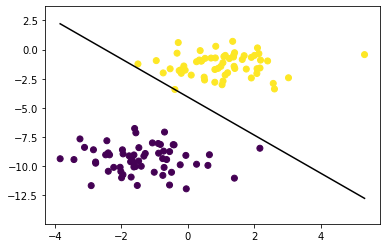

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

p = Perceptron(alpha=0.01, epochs=10)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

# Visualizando o problema que foi solucionado

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

Se você implementou as atividades de 1 à 4 corretamente o seu perceptron deve ser capaz de classificar o problema acima com acurácia de 1.0 (100%). Parabéns!

## OCR: Reconhecimento Óptico de Caracteres
Vamos resolver um problema de OCR simples que pode ser caracterizado como um problema de classificação, que recebe a imagem de um caracter como input e retorna a label correspondente.

## Dataset
Faremos uso do dataset MNIST: http://yann.lecun.com/exdb/mnist/

![picture](https://drive.google.com/uc?id=1qfouepB0Dd5BmGofIS7Nafa-nE7m9TIs)

Esse dataset é composto "imagens" de números de 0 à 9, e contém 60.000 exemplos de treinamento e 10.000 exemplos de teste.

A palavra "imagens" foi posta entre aspas porque os arquivos não estão salvos em .png ou .jpg, eles já estão num arquivo binário descrito no link do dataset que contém as informações pixel a pixel dos exemplos.

Como o foco desse trabalho não é a manipulação de arquivos com python, deixei disponível aqui embaixo algumas funções que já tratarão desses dados e disponibilizarão de maneira simples para vocês usarem.

In [5]:
# download do dataset (training set images)
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
# download do dataset (training set labels)
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# download do dataset (testing set images)
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
# download do dataset (testing set labels)
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  47.0M      0 --:--:-- --:--:-- --:--:-- 46.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0   478k      0 --:--:-- --:--:-- --:--:--  478k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  12.8M      0 --:--:-- --:--:-- --:--:-- 12.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  76983      0 --:--:-- --:--:-- --:--:-- 76983


In [6]:
# Extrair arquivos
!gunzip *

gzip: sample_data is a directory -- ignored
gzip: t10k-images-idx3-ubyte: unknown suffix -- ignored
gzip: t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: t10k-labels-idx1-ubyte: unknown suffix -- ignored
gzip: t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: train-images-idx3-ubyte: unknown suffix -- ignored
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
y
gzip: train-labels-idx1-ubyte: unknown suffix -- ignored
gzip: train-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? 

In [7]:
def bytes_to_int(byte_data):
    return int.from_bytes(byte_data, 'big')

def read_images(filename, n_max_images=None, show = False):
    images = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_images = bytes_to_int(f.read(4))
        if n_max_images:
            n_images = n_max_images
        n_rows = bytes_to_int(f.read(4))
        n_columns = bytes_to_int(f.read(4))
        for image_idx in range(n_images):
            image = []
            for row_idx in range(n_rows):
                row = []
                for col_idx in range(n_columns):
                    if show:
                        pixel = f.read(1)
                    else:
                        pixel = bytes_to_int(f.read(1))
                    row.append(pixel)
                image.append(row)
            images.append(image)
    return images

def read_labels(filename, n_max_labels=None):
    labels = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_labels = bytes_to_int(f.read(4))
        if n_max_labels:
            n_labels = n_max_labels
        for label_idx in range(n_labels):
            label = bytes_to_int(f.read(1))
            labels.append(label)
    return labels

In [8]:
def flatten_list(l):
    return [pixel for sublist in l for pixel in sublist]
    
def extract_features(X):
    return [flatten_list(sample) for sample in X]

A função `extract_features` seria responsável por extrair features das imagens, porém como estamos carregando todos os dados diretamente nos neurônios, ela só irá chamar a função `flatten_list` para todos os samples.

A função `flatten_list` irá transformar o que era uma matriz de dados 28 x 28 em um simples vetor com 784 valores que será carregado como input para nosso perceptron.

## Pré-Processamento

In [9]:
TEST_DATA_FILENAME = 't10k-images-idx3-ubyte'
TEST_LABELS_FILENAME = 't10k-labels-idx1-ubyte'
TRAIN_DATA_FILENAME = 'train-images-idx3-ubyte'
TRAIN_LABELS_FILENAME = 'train-labels-idx1-ubyte'

n_train = 1000 # Numero de imagens carregadas para treinamento
n_test = 100 # Numero de imagens carregadas para teste

x_train = read_images(TRAIN_DATA_FILENAME, n_train)
y_train = np.array(read_labels(TRAIN_LABELS_FILENAME, n_train)).reshape(n_train,1)
print(len(x_train[0]))
print(len(x_train[0][0]))

x_test = read_images(TEST_DATA_FILENAME, n_test)
y_test = read_labels(TEST_LABELS_FILENAME, n_test)

x_train = np.array(extract_features(x_train))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
x_test = np.array(extract_features(x_test))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
print(len(x_train[0]))


28
28
784


### Visualização

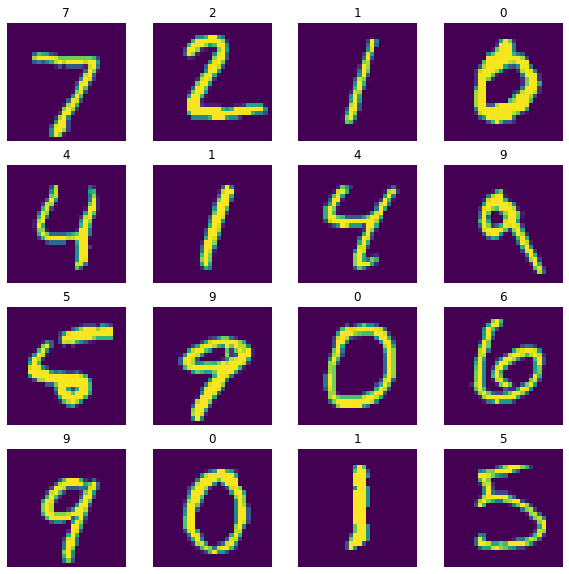

In [10]:
from PIL import Image

sample_images = read_images(TEST_DATA_FILENAME, 16, show=True)
sample_labels = read_labels(TEST_LABELS_FILENAME, 16)
plt.figure(figsize=(10, 10))
for idx, test_sample in enumerate(sample_images):
    img = Image.fromarray(np.array(test_sample), 'L')
    ax = plt.subplot(4, 4, idx + 1)
    plt.imshow(img)
    plt.title(int(sample_labels[idx]))
    plt.axis("off")   

## Modelagem

Nossa solução fará uso de 10 perceptrons classificadores, 1 para cada classe (número).

Como cada classificador será treinado individualmente, será necessário transformar o vetor de labels para cada neurônio de maneira a garantir que o erro será calculado corretamente.

Exemplo para o perceptron classificador de 1s: Label = `[0,1,4,1,5]` -> `[0, 1, 0, 1, 0]`

Além disso a saída será individualizada, ou seja, não teremos uma saída final com a previsão da rede, ao invés disso teremos 10 saídas independentes que precisamos unir para avaliar a saída completa. 

Aqui surgirá um problema de quebrar os empates, ou seja, quando mais de um perceptron ativar para uma mesma entrada. Nesse primeiro momento iremos converter o vetor de labels para que cada label seja equivalente a um vetor de 10 posições de 0s e 1s correspondente ao output desejado da rede completa unida, e verificaremos se o vetor resultante da nossa rede é igual ao desejado.

Exemplo: Label = `[5]` -> `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`

### Começando com o perceptron classificador de 1s:

In [11]:
P = Perceptron(alpha=0.1, epochs=50)

# Formatar labels de treinamento: [ATIVIDADE 5]

y_formatado = np.where(y_train == 1, 1, 0)

# Treinar Rede: [ATIVIDADE 6]

P.fit(x_train, y_formatado)

# Gerar vetor de predições: [ATIVIDADE 7]

predictions = P.predict(x_test)

print(y_test)
print(predictions)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9]
[0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0]


### Atividade 5: Formatar labels de treinamento
Como comentado mais acima precisamos transformar as labels do tipo `[0,1,4,1,5]` -> `[0, 1, 0, 1, 0]` para que seja possível treinar o neurônio classificador de 1s.


### Atividade 6: Treinar o perceptron
Chamar a função fit passando como parâmetros o `x_train` e o `y_formatado`.

### Atividade 7: Gerar vetor de predições
Chamar a função predict passando x_test como parâmetro para obter o vetor de saída do perceptron.


Se tudo for realizado corretamente o print deverá conter um vetor de labels (`y_test`) com 10 numeros, e o print de predições deve apresentar 1 apenas nas posições correspondentes à label `1` no vetor de labels.

### Agora com os 10 classificadores

In [12]:
P_list = []
# Inicialize uma lista de 10 perceptrons: [ATIVIDADE 8]

P_list = [Perceptron(alpha=1, epochs=20) for i in range(10)]

# Loop de treinamento: [Atividade 9]

for i in range(len(P_list)):
  P_list[i].fit(x_train, np.where(y_train == i, 1, 0))

predictions = []
# Loop de predições: [Atividade 10]

predictions = [i.predict(x_test) for i in P_list]



### Atividade 8: Inicialize a lista de perceptrons
Faça um loop que inicializará uma lista de 10 perceptrons.



### Atividade 9: Loop de treinamento
Aqui dentro você precisa formatar o vetor de y_train para cada neurônio a ser treinado, e passar o y_formatado para dentro da função de treinamento de cada neurônio.

### Atividade 10: Loop de predições
Aqui precisamos passar por todo o vetor de perceptrons e calcular suas predições para o input `x_test`.

### Formatando tudo para calcular acuracia

A variável predictions contém o resultado da predição dos nossos 10 perceptrons, e para cada um deles existe um vetor de n_test predições. 

Para que possamos calcular a acurácia precisamos agrupar a primeira predição de cada perceptron, a segunda de cada perceptron, e assim por diante.

Além disso precisamos converter o nosso vetor de labels para comparar com as predições. Lembrando que aqui teremos o problema de quebrar empates, e com essa solução iremos considerar que um empate, ou seja, quando dois ou mais perceptrons ativarem para o mesmo input, é um erro.


In [13]:
# Reformatando o vetor de predições
grouped_predictions = []
for i in range(n_test):
  singlePrediction = []
  for j, prediction in enumerate(predictions):
    singlePrediction.append(prediction[i])
  grouped_predictions.append(singlePrediction)

# Reformatando o vetor de labels
def convert_number_to_array_prediction(n):
  array_prediction = np.zeros(10)
  array_prediction[n] = 1
  return array_prediction

def convert_y_test_to_array_prediction(ytest):
  convertedList = []
  for i in ytest:
    convertedList.append(convert_number_to_array_prediction(i))
  return np.array(convertedList)

# Salvando novo vetor de y_test
y_test_as_array = convert_y_test_to_array_prediction(y_test)

# Definindo nova função de acuracia [OBS2]
hits = 0
for i, prediction in enumerate(grouped_predictions):
  # print(prediction)
  # print(convertedArray[i])
  if (prediction == y_test_as_array[i]).all():
    hits+=1

# print('gp', grouped_predictions)
# print('y', y_test_as_array)
print('Acuracia: ',hits/n_test)

Acuracia:  0.75


OBS2: Precisamos definir nova função para calcular acurácia porque estamos comparando vetores inteiros. (verificar `.all()` e `.any()` na documentação do numpy)

### Atividade 11: Melhorar a Acuracia
Altere o valor de n_test para 100, e modifique os valores de n_train, n_epocas, alpha, etc. Consiga uma acuracia mínima de 70%.

**Mudei n_train para 1000, n_epocas para 20 e alpha para 1**

# Sigmoid como função de ativação

A função de ativação sigmoid é muito utilizada em machine learning. Ela resulta em um output entre 0 e 1, portanto nos permite prever a probabilidade de um output.


Para o nosso problema específico essa função tem um benefício a mais que é o de permitir a quebra de empates com a existencia de valores intermediários entre 0 e 1.

Para implementar o sigmoid o treinamento muda um pouco. No nosso caso não utilizaremos mais o alpha e sim um componente derivativo que assumirá o papel do alpha no treinamento da rede. (Podemos continuar utilizando alpha, mas não é tão necessário quanto no caso da função degrau)

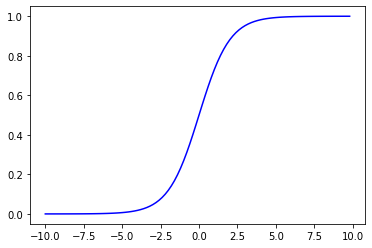

In [14]:
x = np.arange(-10., 10., 0.2)
sig = 1 / (1 + np.exp(-x))
plt.plot(x, sig, 'b', label='Função Sigmoid')

## Começaremos reescrevendo o nosso perceptron

In [15]:
class Perceptron(object):
  
  def __init__(self, epochs=10):
    np.random.seed(1)
    self.epochs = epochs
    self.weights = None
    self.bias = None
  
  def sigmoid_derivative(self, x):
    #computing derivative to the Sigmoid function
    return x * (1 - x)
  
  def fit (self, X, Y):
    n_samples, n_features = X.shape
    # Inicialize os Pesos e Bias: [ATIVIDADE 12]
    self.weights = 2*np.random.random((n_features,))-1
    self.bias = 2*np.random.random() -1

    for epoch in range(self.epochs):
      for x_i, y_esperado in zip(X,Y):
        output = self.predict(x_i)
        # Calcule o sigmoid_derivative : [ATIVIDADE 13]

        predicao = self.predict(x_i.T)
        erro = y_esperado - predicao
        self.weights += x_i * self.sigmoid_derivative(predicao) * erro
        self.bias += self.sigmoid_derivative(predicao) * erro
      
    
  def predict(self, X):
    # Calcule o output do perceptron: [ATIVIDADE 14]
    z = np.dot(X, self.weights) + self.bias
    output = self.activation(z)
    return output

  def activation(self, signal):
    return 1 / (1 + np.exp(-signal)) # Função sigmoid de ativação

### Atividade 12: Inicialize os Pesos e Bias
Como foi feito na atividade 1, inicialize os pesos e bias com valores aleatórios.

### Atividade 13: Calcule o Sigmoid_Derivative
Baseado no nosso neurônio definido mais acima, atualize os pesos e bias substituindo o `self.alpha` por `self.sigmoid_derivative(output)`.

### Atividade 14: Calcule o output do perceptron
Baseado no nosso neurônio definido mais acima (atividade 3), faça o cálculo do output do perceptron.

In [16]:
P_list = []
# Liste, Treine e Rode seu sistema de 10 perceptrons: [ATIVIDADE 15]

P_list = [Perceptron(epochs=20) for i in range(10)]

for i in range(len(P_list)):
  P_list[i].fit(x_train, np.where(y_train == i, 1, 0))

predictions = [i.predict(x_test) for i in P_list]


### Atividade 15: Liste, Treine e Rode o sistema
Como feito anteriormente [8, 9, 10] Inicialize seu sistema, treine, e gere seu vetor de predições.

In [17]:
y_test = np.array(read_labels(TEST_LABELS_FILENAME, n_test)).reshape(n_test,1)

final_predictions = []
# Preencha o vetor final_predictions: [ATIVIDADE 16]

final_predictions = [0]*len(y_test)

for i in range(len(y_test)):
  prediction = [a[i] for a in predictions]
  final_predictions[i] = prediction.index(max(prediction))

print(accuracy(final_predictions, y_test))


0.79


### Atividade 16: Preencher o vetor `final_predictions`
Para cada exemplo de teste precisamos percorrer o vetor de predições e salvar o `indice` (correspondente a label do neuronio) do maior valor encontrado para cada predição no vetor `final_predictions`.

# Alguns questionamentos

**1. Compare o desempenho obtido pelo perceptron 1, com função de ativação degrau e do perceptron 2, com função de ativação sigmoid.**

Resposta: O perceptron 2 teve melhor acurácia (79%) que o perceptron (75%)

**2. Que parâmetros podemos modificar para melhorar a acuracia?**

Resposta: no caso do perceptron 1, o valor de alpha, o número de épocas e o tamanho da quantidade de casos de treino. No perceptron 2, o número de épocas e a quantidade de casos de treino.

# Code Snippets (Caso necessitem de alguma ajuda)

In [18]:
# Como fazer Random em python?
r = np.random.random() # valor entre 0 e 1
print(r)
r = 2*np.random.random() - 1 # valor entre -1 e 1
print(r)
vr = np.random.random((3,)) # Inicializando vetor aleatório com shape (3,1)
print(vr)

0.587805744380721
0.7837824437239309
[0.09247225 0.48348591 0.88531705]


In [19]:
# Multiplicação de vetores
a = [1, 2, 3]
b = [4, 5, 6]
c = np.dot(a,b)
print(c)

32


In [20]:
# Formatando arrays com condicionais
a = np.array([1, 2, 3, 4, 2, 5, 2, 1])
b = np.where( a==2 , 1, 0)
print(b)

[0 1 0 0 1 0 1 0]


In [21]:
# Adicionando itens em uma lista
a = [1, 2]
a.append(3)
print(a)

[1, 2, 3]
